In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from geopy.geocoders import Nominatim
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os
import joblib
import pickle
import mlflow.sklearn

In [2]:
from sklearn.ensemble import RandomForestRegressor

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv(r"C:\Users\axa\THE BRIDGE_23\SEMANA 25. DESAFIO TRIPULACIONES\df.csv", sep=",")

* 0= origin_id: Identificador único para cada inmueble (int64)
* 1= construction_year: Año de construcción del inmueble (object)
* 2= area: Área o superficie del inmueble en metros cuadrados (int64)
* 3= local_price: Precio de alquiler local del inmueble (int64)
* 4= replace (object)______________Latitud
* 5= replace.1: (object)___________Longitud
* 6= tipology: Tipo de propiedad ("Piso", "Casa", .)(objet)
* 7= first_appearance Fecha y hora en las que el inmueble apareció por primera vez (object)
* 8= last_appearance: Fecha y hora en las que el inmueble fue retirado del mercado (object)
* 9= is_exact_address: Valor booleano que indica si la dirección es exacta (object)
* 10= description: Texto descriptivo (object)
* 11= title: Título relacionados con el inmueble (object)
* 12= url: URL relacionada con el inmueble (object)
* 13=n_rooms: Número de habitaciones (float64)
* 14= n_baths: Número de baños (float64)
* 15= n_floor: Planta del inmueble (float64)
* 16= is_vertical: Relacionado con la orientación del inmueble (float64)
* 17= has_storage: Tiene trastero o no (objeto)
* 18= has_garage: Tiene garaje o no (objeto)
* 19= has_garage_included: Tiene garaje incluido o no (objeto)
* 20= has_common_zones: Tiene zonas comunes o no (objeto)
* 21= has_pool: Tiene piscina o no (objeto)
* 22= has_air_conditioner: Tiene aire acondicionado o no (objeto)
* 23= has_elevator: Tiene ascenso o no (objeto)
* 24= has_terrace: Tiene terraza o no (objeto)
* 25= is_exterior: Es exterior o no (objeto)
* 26= cardinal_direction_id: Identificador relacionado con la dirección cardinal (float64)
* 27= has_racket_zone: Tiene instalaciones para jugar tennis o raqueta o no (objeto)
* 28= has_security: Tiene o no seguridad (objeto)
* 29= direccion
* 30= distrito

In [6]:
# Eliminar 17 Columnas
columns_to_drop = ['Unnamed: 0', 'origin_id', 'construction_year', 'first_appearance', 'last_appearance', 'is_exact_address','is_vertical','n_floor', 'has_storage', 'has_garage_included', 'has_common_zones', 'has_terrace', 'has_air_conditioner', 'cardinal_direction_id','has_racket_zone','has_security','direccion']
df1 = df.drop(columns=columns_to_drop)

In [7]:
df1

,area,local_price,replace,replace.1,tipology,description,title,url,n_rooms,n_baths,has_garage,has_pool,has_elevator,is_exterior,distrito
0,135,3200,40.437687,-3.691055,Piso,APARTAMENTOS PREMIUM DE 1 - 2 y 3 DORMITORIOS ...,Alquiler de Piso en Almagro,https://www.idealista.com/inmueble/102176515/,1.0,2.0,t,f,t,t,Chamberí
1,250,6000,40.439434,-3.686233,Piso,TOP TEAM alquila fantástico piso de 250m2. Muy...,Alquiler de Piso en El Viso,https://www.idealista.com/inmueble/100344539/,4.0,4.0,t,t,t,t,Chamartín
2,146,2460,40.468037,-3.708661,Piso,** VIVIENDA SIN AMUEBLAR **Para más viviendas ...,Alquiler de Piso en paseo de la Dirección 161,https://www.idealista.com/inmueble/102173468/,3.0,2.0,t,t,t,t,Tetuán
3,98,3000,40.441212,-3.670406,Piso,DISPONIBLE PARA ENTRADAS INMEDIATAS **Precio v...,Alquiler de Piso en calle de Clara del Rey,https://www.idealista.com/inmueble/101928841/,3.0,3.0,NaN,f,f,t,Chamartín
4,125,3675,40.411247,-3.668222,Piso,Abstenerse agencias y/o intermediarios. Contac...,Alquiler de Piso en calle de los Astros 2,https://www.idealista.com/inmueble/102182552/,3.0,2.0,t,t,t,t,Retiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,45,1450,40.414158,-3.701161,Piso,[ESP] DISPONIBLE EN: Marzo. Reserve en línea h...,Alquiler de Piso en calle de las Huertas 3,https://www.idealista.com/inmueble/100686202/,2.0,1.0,NaN,f,NaN,NaN,Centro
6358,30,1250,40.425045,-3.705386,Piso,[ESP] DISPONIBLE EN: Febrero. Reserve en línea...,Alquiler de Piso en calle del Tesoro s/n,https://www.idealista.com/inmueble/100686259/,2.0,1.0,NaN,f,NaN,NaN,Centro
6359,73,900,40.392933,-3.736926,Piso,NaN,NaN,https://www.idealista.com/inmueble/85909238,3.0,1.0,t,NaN,t,t,Carabanchel
6360,32,850,40.417221,-3.703297,Piso,¡Gran oportunidad de alquiler En pleno centro ...,Alquiler de Estudio en jardines,https://www.idealista.com/inmueble/102254505/,NaN,1.0,NaN,f,t,t,Centro


In [8]:
# Renombrar la columna "replace" a "latitud"
df1 = df1.rename(columns={'replace': 'latitud'})

In [9]:
# Renombrar la columna "replace.1" a "longitud"
df1 = df1.rename(columns={'replace.1': 'longitud'})

# VALORES NULOS

In [10]:
def imputar_n_rooms(row):
    if pd.notna(row['n_rooms']):
        return row['n_rooms']
    elif pd.notna(row['description']):
        description = row['description'].lower()
        if 'estudio' in description or 'loft' in description or 'sin divisiones' in description:
            return 0
    return None

df1['n_rooms'] = df1.apply(imputar_n_rooms, axis=1)

In [11]:
df1['n_rooms'].fillna(1, inplace=True)

In [12]:
df1['n_baths'].fillna(1, inplace=True)

In [13]:
indice_fila = df1[df1['n_baths'] == 0.0].index[0]
df1.at[indice_fila, 'n_baths'] = 2.0

In [14]:
indice_fila = df1[df1['n_baths'] == 20.0].index[0]
df1.at[indice_fila, 'n_baths'] = 2.0

In [15]:
indice_fila = df1[df1['n_baths'] == 22.0].index[0]
df1.at[indice_fila, 'n_baths'] = 2.0

In [16]:
indice_fila = df1[df1['n_baths'] == 55.0].index[0]
df1.at[indice_fila, 'n_baths'] = 1.0

In [17]:
keywords = ['garaje', 'garage', 'plaza de parking', 'parking']
condition = df1['description'].str.contains('|'.join(keywords), case=False)
df1['has_garage'] = condition.apply(lambda x: 't' if x else 'f')

In [18]:
df1.loc[df1['tipology'] == 'chalet', 'has_garage'] = 't'

In [19]:
keywords = ['piscina', 'tiene piscina', 'dispone de piscina']
condition = df1['description'].str.contains('|'.join(keywords), case=False)
df1['has_pool'] = np.where(condition, 't', 'f')

In [20]:
condition = (df1['has_elevator'].isnull()) & (df1['description'].str.contains('con ascensor|tiene ascensor', case=False, na=False))
df1.loc[condition, 'has_elevator'] = 't'
condition = (df1['has_elevator'].isnull())
df1.loc[condition, 'has_elevator'] = 'f'

In [21]:
condition = (df1['is_exterior'].isnull()) & (df1['description'].str.contains('exterior|con terraza', case=False, na=False))
df1.loc[condition, 'is_exterior'] = 't'
condition = (df1['is_exterior'].isnull())
df1.loc[condition, 'is_exterior'] = 'f'

In [22]:
mapeo_distritos = {
    "Universidad": "Centro",
    "Justicia": "Centro",
    "Distrito Municipal I (sin urbanizaciones)": "Centro",
    "Calle de Rejas": "Barajas",
    "Plaza de los Emperadores": "Barajas",
    "Colina": "Ciudad Lineal",
    "Casa de Campo": "Moncloa-Aravaca",
    "Ciudad Jardín": "Chamartín",
    "Campamento": "Latina",
    "Bellas Vistas": "Tetuán",
    "Valdefuentes": "Hortaleza",
    "Trafalgar": "Chamberí",
    "Mirasierra": "Fuencarral-El Pardo"
}
df1['distrito'] = df1['distrito'].map(mapeo_distritos).fillna(df1['distrito'])
print(df1['distrito'].unique())

['Chamberí' 'Chamartín' 'Tetuán' 'Retiro' 'Hortaleza' 'Salamanca' 'Centro'
 'Arganzuela' 'Moncloa-Aravaca' 'Latina' 'Villa de Vallecas' 'Barajas'
 'Ciudad Lineal' 'Vicálvaro' 'Puente de Vallecas' 'Fuencarral-El Pardo'
 'Carabanchel' 'Usera' 'San Blas - Canillejas' 'Villaverde' 'Moratalaz'
 'Ciudalcampo' 'La Moraleja']


In [23]:
df1 = df1[~df1['distrito'].isin(['Ciudalcampo', 'La Moraleja'])]

In [24]:
# Eliminar 3 Columnas
df1 = df1.drop(["description", "title", "url"], axis=1)

In [25]:
df1

,area,local_price,latitud,longitud,tipology,n_rooms,n_baths,has_garage,has_pool,has_elevator,is_exterior,distrito
0,135,3200,40.437687,-3.691055,Piso,1.0,2.0,f,f,t,t,Chamberí
1,250,6000,40.439434,-3.686233,Piso,4.0,4.0,t,t,t,t,Chamartín
2,146,2460,40.468037,-3.708661,Piso,3.0,2.0,t,t,t,t,Tetuán
3,98,3000,40.441212,-3.670406,Piso,3.0,3.0,f,f,f,t,Chamartín
4,125,3675,40.411247,-3.668222,Piso,3.0,2.0,t,t,t,t,Retiro
...,...,...,...,...,...,...,...,...,...,...,...,...
6357,45,1450,40.414158,-3.701161,Piso,2.0,1.0,f,f,f,f,Centro
6358,30,1250,40.425045,-3.705386,Piso,2.0,1.0,f,f,f,f,Centro
6359,73,900,40.392933,-3.736926,Piso,3.0,1.0,t,t,t,t,Carabanchel
6360,32,850,40.417221,-3.703297,Piso,0.0,1.0,f,f,t,t,Centro


# TRANSFORMACIONES

In [26]:
# Transformar la variable "tipology" a númerica donde los nuevos valores serán (por orden alfabético) 0= chalet y 1= piso
le = LabelEncoder()
df1['tipology'] = le.fit_transform(df1['tipology'])

In [27]:
# Transformar la variable "has_garage" a númerica donde los nuevos valores serán (por orden alfabético) 0= False y 1= True
le = LabelEncoder()
df1['has_garage'] = le.fit_transform(df1['has_garage'])

In [28]:
# Transformar la variable "has_pool" a númerica donde los nuevos valores serán (por orden alfabético) 0= False y 1= True
le = LabelEncoder()
df1['has_pool'] = le.fit_transform(df1['has_pool'])

In [29]:
# Transformar la variable "has_elevator" a númerica donde los nuevos valores serán (por orden alfabético) 0= False y 1= True
le = LabelEncoder()
df1['has_elevator'] = le.fit_transform(df1['has_elevator'])

In [30]:
# Transformar la variable "is_exterior" a númerica donde los nuevos valores serán (por orden alfabético) 0= False y 1= True
le = LabelEncoder()
df1['is_exterior'] = le.fit_transform(df1['is_exterior'])

In [31]:
# Transformar la variable "distrito" a variables dummies y evitar la colinealidad, eliminando 1 columna dummie.
df1 = pd.get_dummies(df1, columns=['distrito'], prefix=['distrito'], drop_first=True)

In [32]:
df1

,area,local_price,latitud,longitud,tipology,n_rooms,n_baths,has_garage,has_pool,has_elevator,...,distrito_Moratalaz,distrito_Puente de Vallecas,distrito_Retiro,distrito_Salamanca,distrito_San Blas - Canillejas,distrito_Tetuán,distrito_Usera,distrito_Vicálvaro,distrito_Villa de Vallecas,distrito_Villaverde
0,135,3200,40.437687,-3.691055,1,1.0,2.0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,250,6000,40.439434,-3.686233,1,4.0,4.0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,146,2460,40.468037,-3.708661,1,3.0,2.0,1,1,1,...,False,False,False,False,False,True,False,False,False,False
3,98,3000,40.441212,-3.670406,1,3.0,3.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,125,3675,40.411247,-3.668222,1,3.0,2.0,1,1,1,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,45,1450,40.414158,-3.701161,1,2.0,1.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6358,30,1250,40.425045,-3.705386,1,2.0,1.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6359,73,900,40.392933,-3.736926,1,3.0,1.0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
6360,32,850,40.417221,-3.703297,1,0.0,1.0,0,0,1,...,False,False,False,False,False,False,False,False,False,False


# EDA

In [33]:
df1

,area,local_price,latitud,longitud,tipology,n_rooms,n_baths,has_garage,has_pool,has_elevator,...,distrito_Moratalaz,distrito_Puente de Vallecas,distrito_Retiro,distrito_Salamanca,distrito_San Blas - Canillejas,distrito_Tetuán,distrito_Usera,distrito_Vicálvaro,distrito_Villa de Vallecas,distrito_Villaverde
0,135,3200,40.437687,-3.691055,1,1.0,2.0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,250,6000,40.439434,-3.686233,1,4.0,4.0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,146,2460,40.468037,-3.708661,1,3.0,2.0,1,1,1,...,False,False,False,False,False,True,False,False,False,False
3,98,3000,40.441212,-3.670406,1,3.0,3.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,125,3675,40.411247,-3.668222,1,3.0,2.0,1,1,1,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,45,1450,40.414158,-3.701161,1,2.0,1.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6358,30,1250,40.425045,-3.705386,1,2.0,1.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6359,73,900,40.392933,-3.736926,1,3.0,1.0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
6360,32,850,40.417221,-3.703297,1,0.0,1.0,0,0,1,...,False,False,False,False,False,False,False,False,False,False


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6357 entries, 0 to 6361
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area                            6357 non-null   int64  
 1   local_price                     6357 non-null   int64  
 2   latitud                         6357 non-null   float64
 3   longitud                        6357 non-null   float64
 4   tipology                        6357 non-null   int32  
 5   n_rooms                         6357 non-null   float64
 6   n_baths                         6357 non-null   float64
 7   has_garage                      6357 non-null   int32  
 8   has_pool                        6357 non-null   int32  
 9   has_elevator                    6357 non-null   int32  
 10  is_exterior                     6357 non-null   int32  
 11  distrito_Barajas                6357 non-null   bool   
 12  distrito_Carabanchel            6357 no

In [35]:
df1.describe()

,area,local_price,latitud,longitud,tipology,n_rooms,n_baths,has_garage,has_pool,has_elevator,is_exterior
count,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000
mean,112.499764,2343.829007,40.431640,-3.686978,0.974674,2.202297,1.796445,0.324524,0.236904,0.806670,0.841120
std,139.961241,1831.575498,0.029419,0.033596,0.157127,1.268652,1.071001,0.468234,0.425216,0.394941,0.365593
min,17.000000,0.000000,40.332451,-3.832705,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,1200.000000,40.414422,-3.704376,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,85.000000,1800.000000,40.429146,-3.691893,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000
75%,130.000000,2880.000000,40.450275,-3.674434,1.000000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,7840.000000,20000.000000,40.616005,-3.528354,1.000000,22.000000,13.000000,1.000000,1.000000,1.000000,1.000000


# Variable: "area"

In [36]:
unique_values = df1['area'].unique()
unique_values = sorted(unique_values)
unique_values_count = df1['area'].nunique()
area_counts = df1['area'].value_counts()

print("Valores únicos:", unique_values)
print("Cantidad de valores únicos en la columna 'area':", unique_values_count)
print(area_counts)

Valores únicos: [17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 

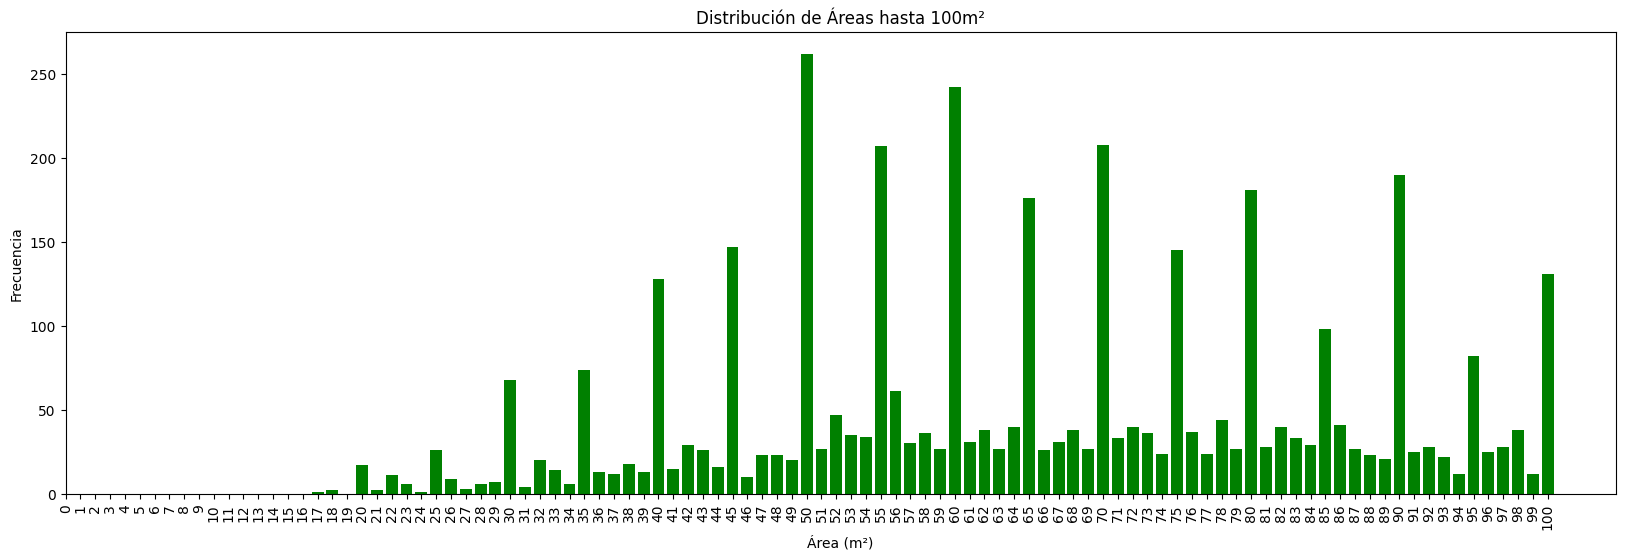

In [37]:
df_areas_hasta_100 = df1[df1['area'] <= 100]
frecuencia_areas = df_areas_hasta_100['area'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
plt.bar(frecuencia_areas.index, frecuencia_areas.values, color='green')
plt.xlabel('Área (m²)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Áreas hasta 100m²')
plt.xticks(range(101), rotation=90)
plt.show()

# Variable: "local_price"

In [38]:
unique_values = df1['local_price'].unique()
unique_values = sorted(unique_values)
unique_values_count = df1['local_price'].nunique()
local_price_counts = df1['local_price'].value_counts()

print("Valores únicos:", unique_values)
print("Cantidad de valores únicos en la columna 'local_price':", unique_values_count)
print(local_price_counts)

Valores únicos: [0, 400, 490, 499, 500, 530, 549, 550, 575, 580, 590, 595, 600, 608, 620, 625, 630, 645, 649, 650, 665, 670, 675, 680, 690, 695, 699, 700, 710, 720, 725, 730, 740, 749, 750, 752, 760, 761, 764, 765, 768, 770, 775, 780, 785, 790, 795, 799, 800, 805, 810, 811, 820, 825, 829, 830, 840, 845, 849, 850, 853, 855, 860, 870, 874, 875, 877, 880, 883, 890, 895, 899, 900, 904, 906, 910, 915, 917, 920, 925, 930, 935, 937, 940, 941, 945, 947, 950, 955, 960, 966, 970, 975, 980, 982, 984, 985, 990, 995, 999, 1000, 1004, 1005, 1010, 1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1060, 1065, 1066, 1070, 1075, 1080, 1085, 1090, 1095, 1100, 1107, 1108, 1110, 1120, 1122, 1125, 1130, 1134, 1135, 1145, 1149, 1150, 1160, 1165, 1170, 1175, 1180, 1185, 1190, 1194, 1195, 1199, 1200, 1210, 1220, 1221, 1225, 1230, 1235, 1240, 1245, 1249, 1250, 1252, 1260, 1261, 1265, 1270, 1275, 1280, 1285, 1289, 1290, 1295, 1299, 1300, 1310, 1320, 1325, 1329, 1347, 1350, 1351, 1357, 1360, 1365, 1370, 1375, 1377,

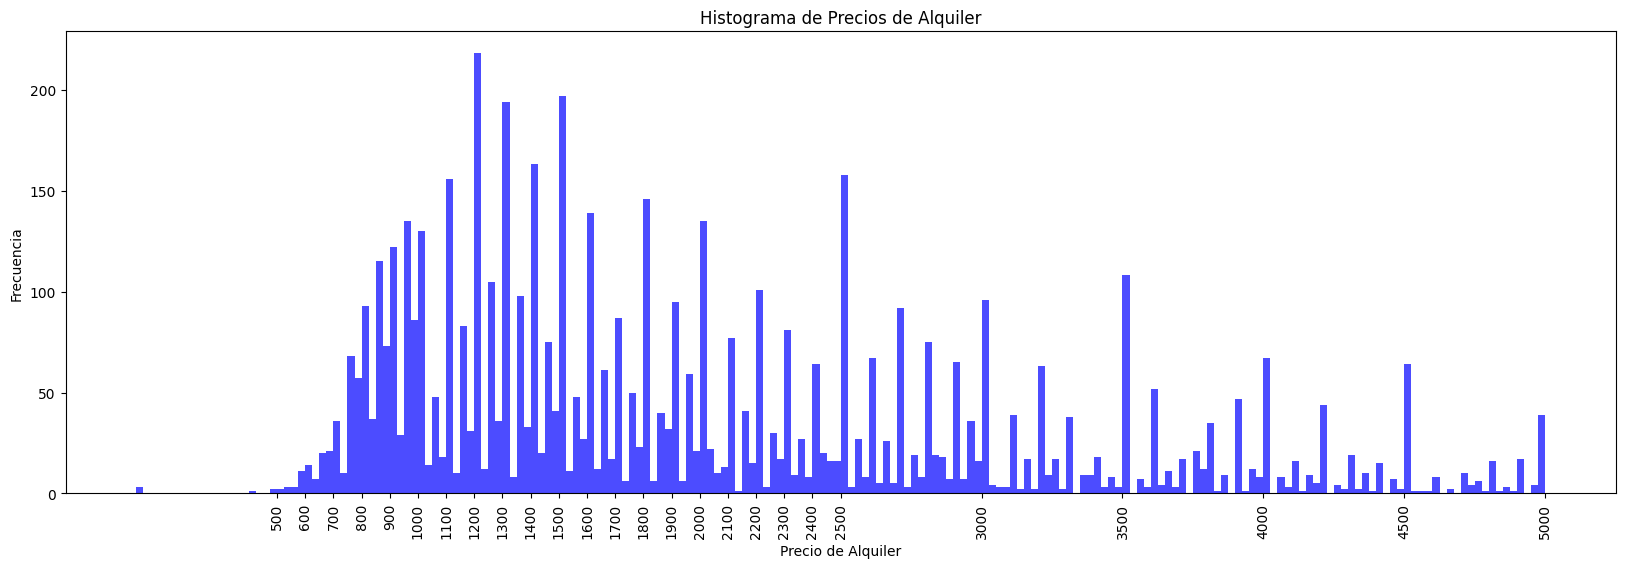

In [39]:
import matplotlib.pyplot as plt
local_prices_filtered = df1[df1['local_price'] <= 5000]['local_price']
plt.figure(figsize=(20, 6))
plt.hist(local_prices_filtered, bins=200, color='blue', alpha=0.7)
x_ticks = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 3000, 3500, 4000, 4500, 5000]
x_labels = [str(x) for x in x_ticks]
plt.xticks(x_ticks, x_labels, rotation=90)
plt.xlabel('Precio de Alquiler')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios de Alquiler')
plt.show()


# Variable: "tipology"... (chalet / piso)

In [40]:
unique_values = df1['tipology'].unique()
unique_values = sorted(unique_values)
unique_values_count = df1['tipology'].nunique()
tipology_counts = df1['tipology'].value_counts()

print("Valores únicos:", unique_values)
print("Cantidad de valores únicos en la columna 'tipology':", unique_values_count)
print(tipology_counts)

Valores únicos: [0, 1]
Cantidad de valores únicos en la columna 'tipology': 2
tipology
1    6196
0     161
Name: count, dtype: int64


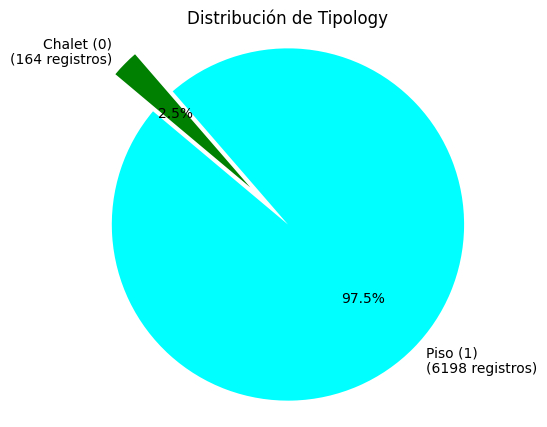

In [41]:
count_tipology = df1['tipology'].value_counts()
labels = ['Piso (1)', 'Chalet (0)']
colors = ['cyan', 'green']
count_records = [6198, 164]
explode = (0, 0.3)
plt.figure(figsize=(5, 5))
_, texts, _ = plt.pie(count_tipology, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
for i, text in enumerate(texts):
    text.set_text(f"{labels[i]}\n({count_records[i]} registros)")
plt.title('Distribución de Tipology')
plt.axis('equal')
plt.show()

# Variable: "n_rooms"

In [42]:
unique_values = df1['n_rooms'].unique()
unique_values = sorted(unique_values)
unique_values_count = df1['n_rooms'].nunique()
n_rooms_counts = df1['n_rooms'].value_counts()

print("Valores únicos:", unique_values)
print("Cantidad de valores únicos en la columna 'n_rooms':", unique_values_count)
print(n_rooms_counts)

Valores únicos: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 22.0]
Cantidad de valores únicos en la columna 'n_rooms': 13
n_rooms
2.0     2078
1.0     1731
3.0     1434
4.0      584
0.0      265
5.0      184
6.0       52
7.0       14
8.0       10
9.0        2
15.0       1
10.0       1
22.0       1
Name: count, dtype: int64


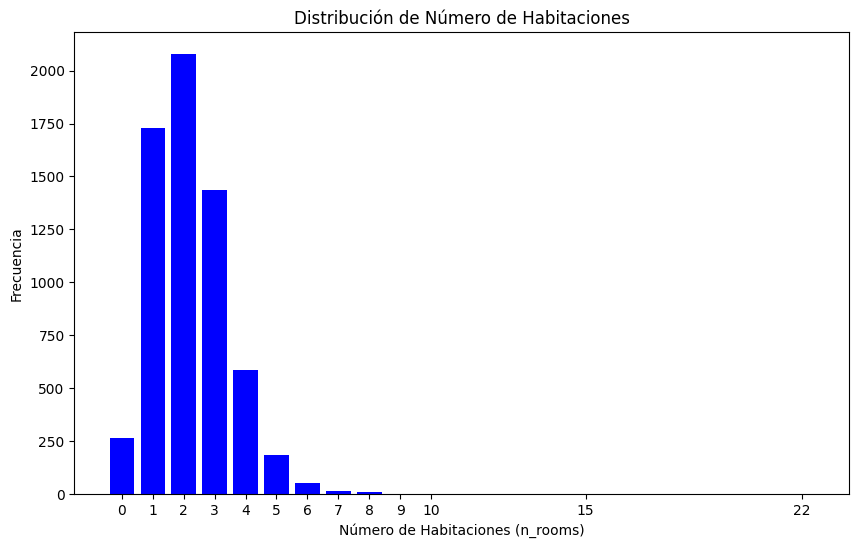

In [43]:
valores_x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 22.0]
frecuencia_n_rooms = df1['n_rooms'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(frecuencia_n_rooms.index, frecuencia_n_rooms.values, color='blue')
plt.xlabel('Número de Habitaciones (n_rooms)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Número de Habitaciones')
plt.xticks(valores_x)
plt.show()

# Variable: "n_baths"

In [44]:
unique_values = df1['n_baths'].unique()
unique_values = sorted(unique_values)
unique_values_count = df1['n_baths'].nunique()
n_baths_counts = df1['n_baths'].value_counts()

print("Valores únicos:", unique_values)
print("Cantidad de valores únicos en la columna 'n_baths':", unique_values_count)
print(n_baths_counts)

Valores únicos: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0]
Cantidad de valores únicos en la columna 'n_baths': 12
n_baths
1.0     3162
2.0     2089
3.0      635
4.0      283
5.0      134
6.0       33
7.0        8
9.0        5
8.0        5
10.0       1
11.0       1
13.0       1
Name: count, dtype: int64


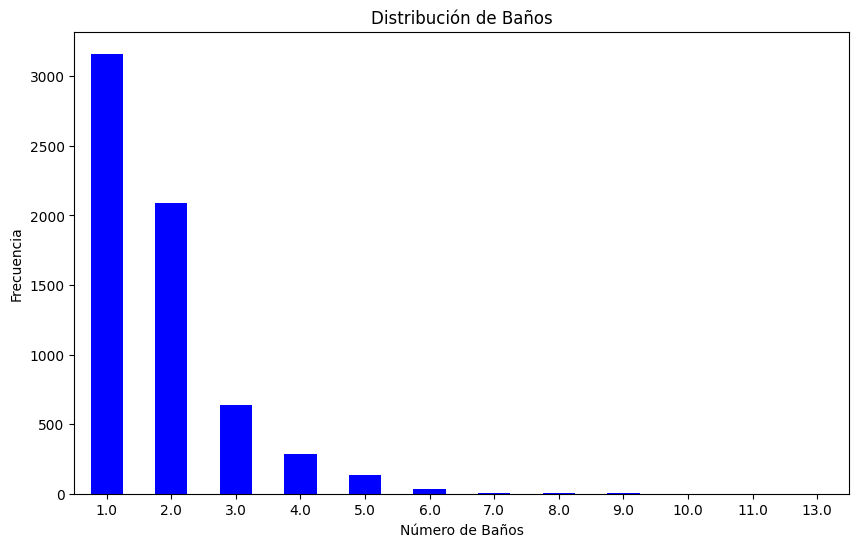

In [45]:
data = df1['n_baths'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
data.plot(kind='bar', color='blue')
plt.title('Distribución de Baños')
plt.xlabel('Número de Baños')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

# Variable: "has_garage"

In [46]:
unique_values = df1['has_garage'].unique()
unique_values = sorted(unique_values)
unique_values_count = df1['has_garage'].nunique()
has_garage_counts = df1['has_garage'].value_counts()

print("Valores únicos:", unique_values)
print("Cantidad de valores únicos en la columna 'has_garage':", unique_values_count)
print(has_garage_counts)

Valores únicos: [0, 1]
Cantidad de valores únicos en la columna 'has_garage': 2
has_garage
0    4294
1    2063
Name: count, dtype: int64


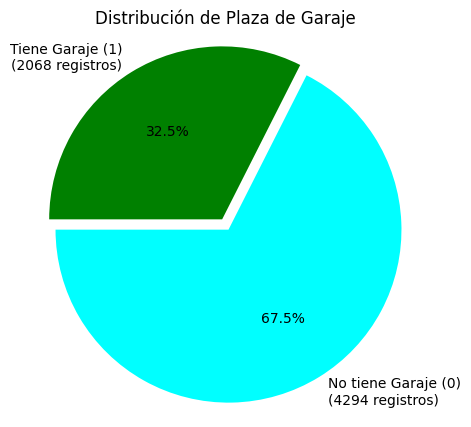

In [47]:
count_tipology = df1['has_garage'].value_counts()
labels = ['No tiene Garaje (0)', 'Tiene Garaje (1)']
colors = ['cyan', 'green']
count_records = [4294, 2068]
explode = (0, 0.07)
plt.figure(figsize=(5, 5))
_, texts, _ = plt.pie(count_tipology, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180, explode=explode)
for i, text in enumerate(texts):
    text.set_text(f"{labels[i]}\n({count_records[i]} registros)")
plt.title('Distribución de Plaza de Garaje')
plt.axis('equal')
plt.show()

# Variable: "has_pool"

In [48]:
unique_values = df1['has_pool'].unique()
unique_values = sorted(unique_values)
unique_values_count = df1['has_pool'].nunique()
has_pool_counts = df1['has_pool'].value_counts()

print("Valores únicos:", unique_values)
print("Cantidad de valores únicos en la columna 'has_pool':", unique_values_count)
print(has_pool_counts)

Valores únicos: [0, 1]
Cantidad de valores únicos en la columna 'has_pool': 2
has_pool
0    4851
1    1506
Name: count, dtype: int64


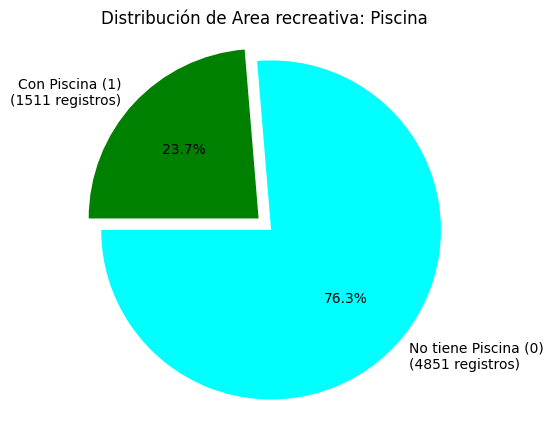

In [49]:
count_tipology = df1['has_pool'].value_counts()
labels = ['No tiene Piscina (0)', 'Con Piscina (1)']
colors = ['cyan', 'green']
count_records = [4851, 1511]
explode = (0, 0.1)
plt.figure(figsize=(5, 5))
_, texts, _ = plt.pie(count_tipology, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180, explode=explode)
for i, text in enumerate(texts):
    text.set_text(f"{labels[i]}\n({count_records[i]} registros)")
plt.title('Distribución de Area recreativa: Piscina')
plt.axis('equal')
plt.show()

# Variable: "has_elevator"

In [50]:
unique_values = df1['has_elevator'].unique()
unique_values = sorted(unique_values)
unique_values_count = df1['has_elevator'].nunique()
has_elevator_counts = df1['has_elevator'].value_counts()

print("Valores únicos:", unique_values)
print("Cantidad de valores únicos en la columna 'has_elevator':", unique_values_count)
print(has_elevator_counts)

Valores únicos: [0, 1]
Cantidad de valores únicos en la columna 'has_elevator': 2
has_elevator
1    5128
0    1229
Name: count, dtype: int64


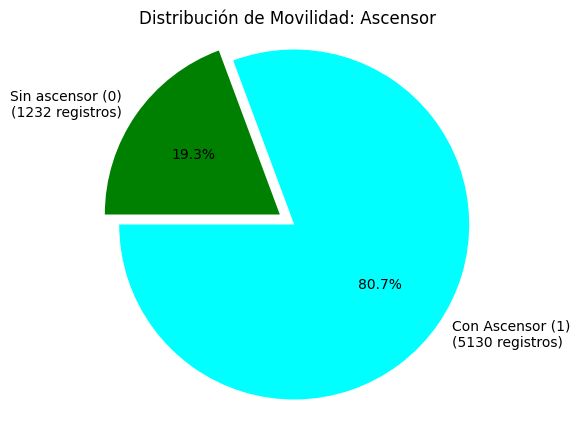

In [51]:
count_tipology = df1['has_elevator'].value_counts()
labels = ['Con Ascensor (1)', 'Sin ascensor (0)']
colors = ['cyan', 'green']
count_records = [5130, 1232]
explode = (0, 0.1)
plt.figure(figsize=(5, 5))
_, texts, _ = plt.pie(count_tipology, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180, explode=explode)
for i, text in enumerate(texts):
    text.set_text(f"{labels[i]}\n({count_records[i]} registros)")
plt.title('Distribución de Movilidad: Ascensor')
plt.axis('equal')
plt.show()

# Variable: "is_exterior"

In [52]:
unique_values = df1['is_exterior'].unique()
unique_values = sorted(unique_values)
unique_values_count = df1['is_exterior'].nunique()
is_exterior_counts = df1['is_exterior'].value_counts()

print("Valores únicos:", unique_values)
print("Cantidad de valores únicos en la columna 'is_exterior':", unique_values_count)
print(is_exterior_counts)

Valores únicos: [0, 1]
Cantidad de valores únicos en la columna 'is_exterior': 2
is_exterior
1    5347
0    1010
Name: count, dtype: int64


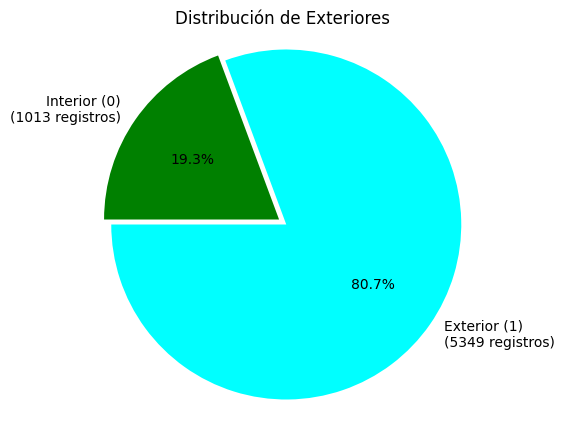

In [53]:
count_tipology = df1['has_elevator'].value_counts()
labels = ['Exterior (1)', 'Interior (0)']
colors = ['cyan', 'green']
count_records = [5349, 1013]
explode = (0, 0.05)
plt.figure(figsize=(5, 5))
_, texts, _ = plt.pie(count_tipology, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180, explode=explode)
for i, text in enumerate(texts):
    text.set_text(f"{labels[i]}\n({count_records[i]} registros)")
plt.title('Distribución de Exteriores')
plt.axis('equal')
plt.show()

In [54]:
matriz_correlacion = df1.corr()
matriz_correlacion

,area,local_price,latitud,longitud,tipology,n_rooms,n_baths,has_garage,has_pool,has_elevator,...,distrito_Moratalaz,distrito_Puente de Vallecas,distrito_Retiro,distrito_Salamanca,distrito_San Blas - Canillejas,distrito_Tetuán,distrito_Usera,distrito_Vicálvaro,distrito_Villa de Vallecas,distrito_Villaverde
area,1.000000,0.536696,0.194144,-0.026069,-0.406560,0.504808,0.577500,0.177324,0.138503,-0.021477,...,-0.010813,-0.040260,0.002025,0.045125,-0.023939,-0.051664,-0.036602,-0.012079,-0.027665,-0.038166
local_price,0.536696,1.000000,0.134577,-0.081092,-0.292697,0.554026,0.742255,0.106142,0.029956,0.089339,...,-0.038805,-0.096412,0.053424,0.253734,-0.091758,-0.082139,-0.074026,-0.068754,-0.078631,-0.085385
latitud,0.194144,0.134577,1.000000,0.072320,-0.168792,0.160367,0.216257,0.194614,0.216742,0.069904,...,-0.052588,-0.179840,-0.163723,-0.037718,0.040171,0.261299,-0.191518,-0.110118,-0.239911,-0.363899
longitud,-0.026069,-0.081092,0.072320,1.000000,0.028467,-0.003917,-0.016678,0.186663,0.220833,0.112881,...,0.075573,0.102082,0.071836,0.112708,0.371778,-0.107215,-0.054282,0.353092,0.273466,-0.012775
tipology,-0.406560,-0.292697,-0.168792,0.028467,1.000000,-0.356298,-0.421437,-0.125638,-0.155084,0.319131,...,-0.006402,0.013845,0.034843,0.064711,-0.004034,0.036192,0.018083,0.007223,0.008519,0.019960
n_rooms,0.504808,0.554026,0.160367,-0.003917,-0.356298,1.000000,0.741862,0.249405,0.123176,0.032538,...,0.028601,-0.010845,0.031422,0.061010,-0.044133,-0.075770,-0.035799,0.013214,-0.032374,-0.030931
n_baths,0.577500,0.742255,0.216257,-0.016678,-0.421437,0.741862,1.000000,0.293008,0.171892,0.072097,...,-0.017041,-0.076714,0.032153,0.113658,-0.048416,-0.080867,-0.062211,-0.004189,-0.030450,-0.065593
has_garage,0.177324,0.106142,0.194614,0.186663,-0.125638,0.249405,0.293008,1.000000,0.528072,0.161514,...,0.006637,-0.023143,-0.013471,-0.086054,0.091329,0.033764,-0.038327,0.089521,0.109237,0.035389
has_pool,0.138503,0.029956,0.216742,0.220833,-0.155084,0.123176,0.171892,0.528072,1.000000,0.103200,...,0.001896,-0.054505,-0.016275,-0.147568,0.100128,-0.015581,-0.025767,0.113023,0.098703,0.052352
has_elevator,-0.021477,0.089339,0.069904,0.112881,0.319131,0.032538,0.072097,0.161514,0.103200,1.000000,...,-0.008834,-0.092878,0.063548,0.129342,-0.013540,-0.003990,-0.085314,0.016684,0.024531,-0.017769


<Axes: >

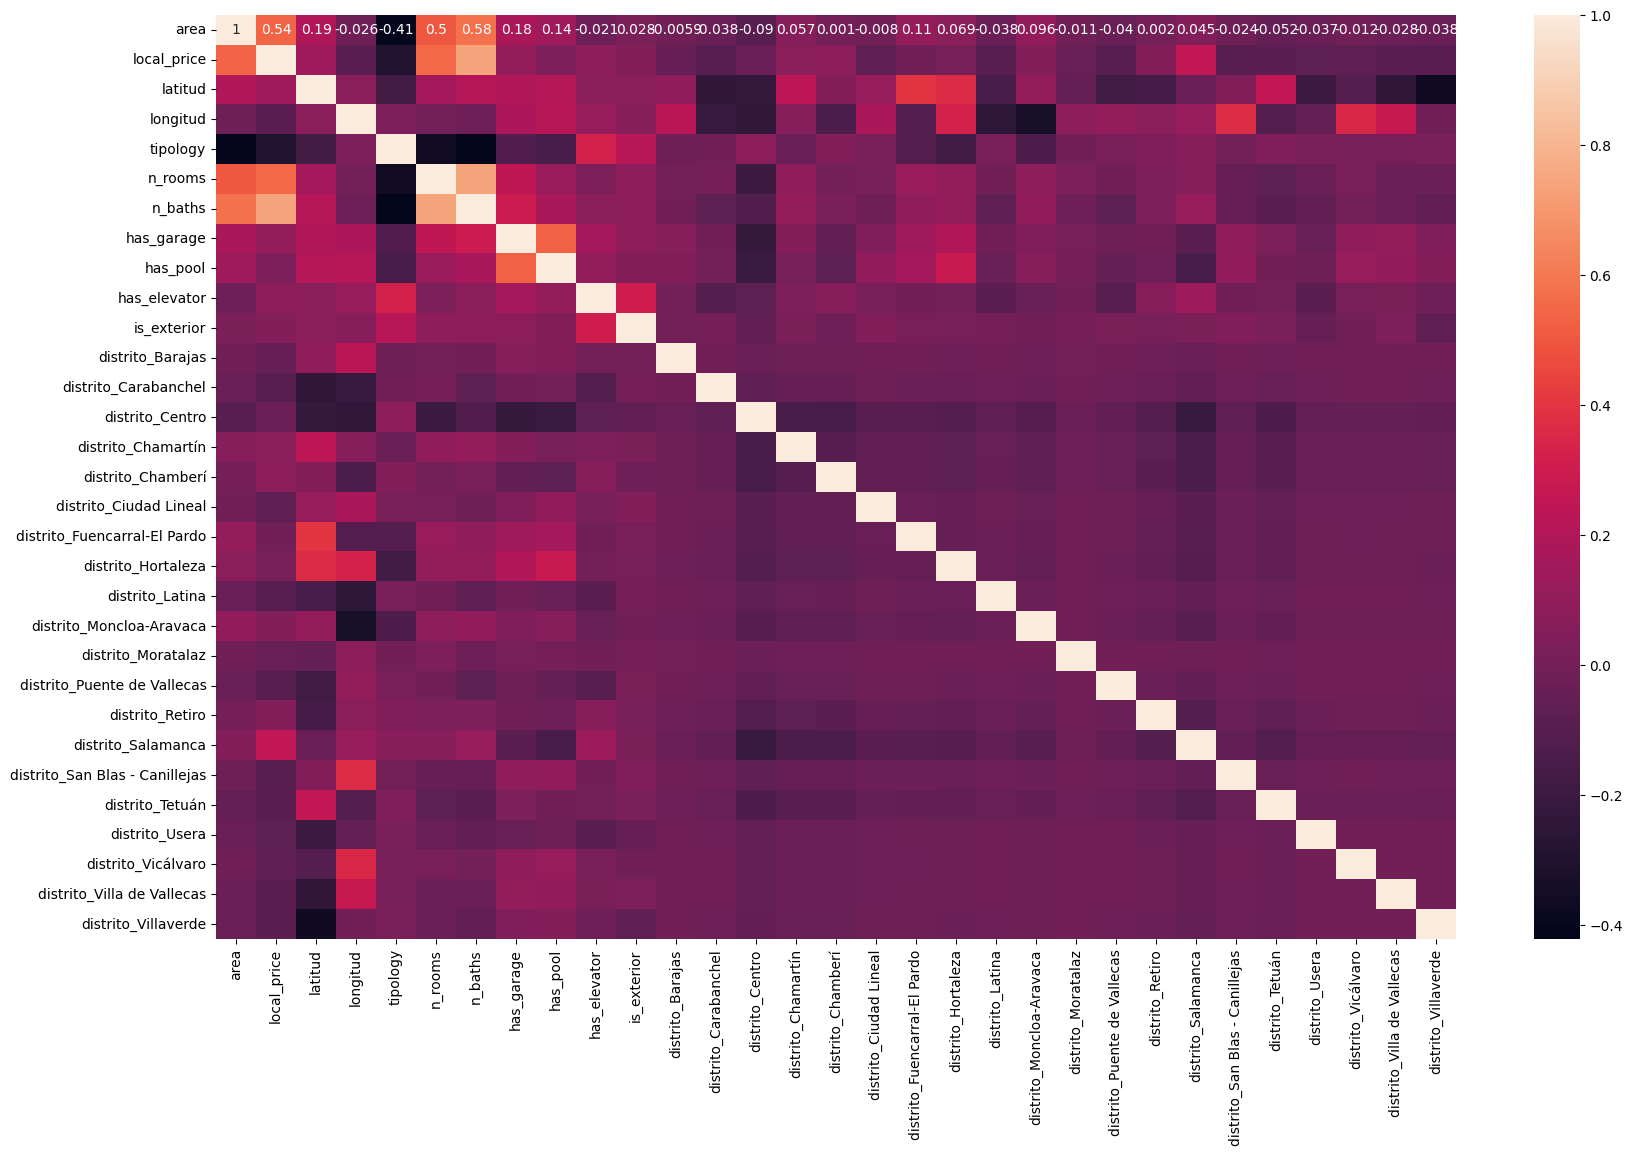

In [55]:
plt.figure(figsize=(20,12))
sns.heatmap(matriz_correlacion,annot=True)

# Estandarización

In [56]:
scaler = StandardScaler()
columns_to_scale = ['area', 'latitud', 'longitud', 'n_rooms', 'n_baths']
df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])

In [57]:
df1

,area,local_price,latitud,longitud,tipology,n_rooms,n_baths,has_garage,has_pool,has_elevator,...,distrito_Moratalaz,distrito_Puente de Vallecas,distrito_Retiro,distrito_Salamanca,distrito_San Blas - Canillejas,distrito_Tetuán,distrito_Usera,distrito_Vicálvaro,distrito_Villa de Vallecas,distrito_Villaverde
0,0.160773,3200,0.205560,-0.121345,1,-0.947771,0.190076,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,0.982494,6000,0.264952,0.022191,1,1.417130,2.057635,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,0.239372,2460,1.237264,-0.645444,1,0.628830,0.190076,1,1,1,...,False,False,False,False,False,True,False,False,False,False
3,-0.103607,3000,0.325381,0.493344,1,0.628830,1.123855,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,0.089319,3675,-0.693225,0.558348,1,0.628830,0.190076,1,1,1,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,-0.482313,1450,-0.594282,-0.422177,1,-0.159470,-0.743704,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6358,-0.589494,1250,-0.224187,-0.547962,1,-0.159470,-0.743704,0,0,0,...,False,False,False,False,False,False,False,False,False,False
6359,-0.282242,900,-1.315801,-1.486848,1,0.628830,-0.743704,1,1,1,...,False,False,False,False,False,False,False,False,False,False
6360,-0.575203,850,-0.490152,-0.485762,1,-1.736071,-0.743704,0,0,1,...,False,False,False,False,False,False,False,False,False,False


In [58]:
import os
carpeta_mis_documentos = r"C:\Users\axa\MisDocumentos"
if not os.path.exists(carpeta_mis_documentos):
    os.makedirs(carpeta_mis_documentos)
ruta_guardado = os.path.join(carpeta_mis_documentos, "alquiler.csv")
df1.to_csv(ruta_guardado, index=False)
print(f"El archivo CSV se ha guardado en: {ruta_guardado}")

El archivo CSV se ha guardado en: C:\Users\axa\MisDocumentos\alquiler.csv


# Prueba de ML (Random Forrest) (Clusterización) (ML)

In [59]:
X = df1.drop('local_price', axis=1)  
y = df1['local_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [60]:
modeloRFR = RandomForestRegressor(n_estimators=100, random_state=1)
modeloRFR.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [61]:
y_pred = modeloRFR.predict(X_test)

In [62]:
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

Error Cuadrático Medio (MSE): 769752.1157329569


In [63]:
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de Determinación (R^2): {r2}')

Coeficiente de Determinación (R^2): 0.7522506291902511


In [64]:
importances = modeloRFR.feature_importances_
feature_names = df1.columns.drop("local_price")
print(feature_names)
print(importances)

Index(['area', 'latitud', 'longitud', 'tipology', 'n_rooms', 'n_baths',
       'has_garage', 'has_pool', 'has_elevator', 'is_exterior',
       'distrito_Barajas', 'distrito_Carabanchel', 'distrito_Centro',
       'distrito_Chamartín', 'distrito_Chamberí', 'distrito_Ciudad Lineal',
       'distrito_Fuencarral-El Pardo', 'distrito_Hortaleza', 'distrito_Latina',
       'distrito_Moncloa-Aravaca', 'distrito_Moratalaz',
       'distrito_Puente de Vallecas', 'distrito_Retiro', 'distrito_Salamanca',
       'distrito_San Blas - Canillejas', 'distrito_Tetuán', 'distrito_Usera',
       'distrito_Vicálvaro', 'distrito_Villa de Vallecas',
       'distrito_Villaverde'],
      dtype='object')
[6.17858101e-01 1.39442110e-01 8.60185505e-02 7.83547121e-04
 2.23437612e-02 7.84908865e-02 6.02591989e-03 7.15448376e-03
 3.55022507e-03 4.14333726e-03 4.90862522e-05 8.95293202e-05
 2.24445384e-03 1.91492161e-03 4.00106636e-03 6.18517013e-04
 5.18343706e-04 4.57508053e-04 1.02377629e-04 5.25788632e-04
 7.2606

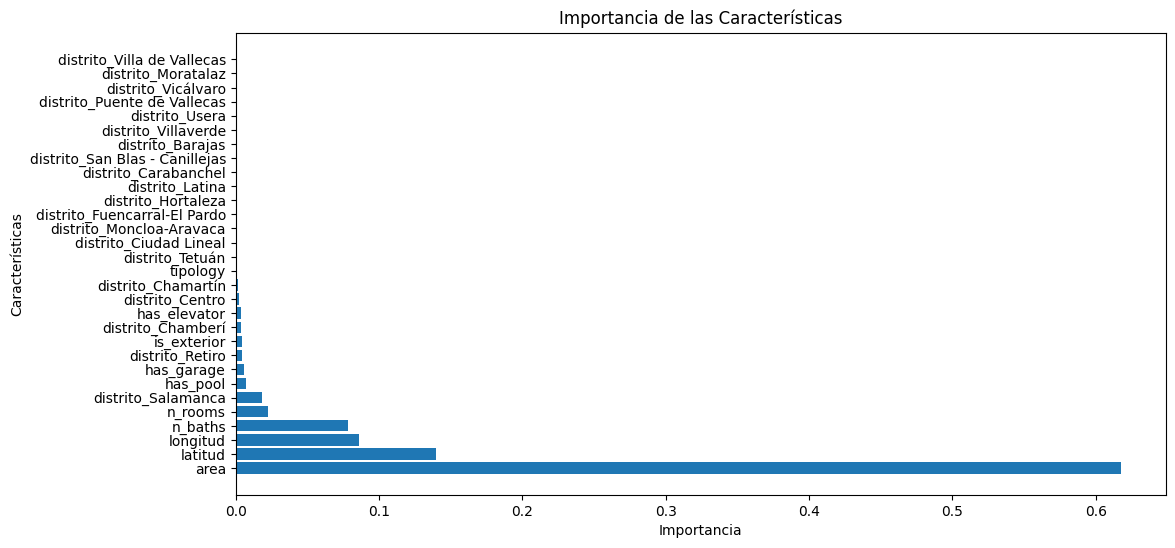

In [65]:
importances = modeloRFR.feature_importances_
feature_names = df1.columns.drop("local_price")  # Excluir la columna "local_price"

# Crear un DataFrame con las importancias y los nombres de las características
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.show()